## Imports

In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
from PIL import ImageDraw
keras = tf.keras

## Open the image

In [2]:
img = Image.open('../data/ship_detection/Sentinel1_Image_20221202_Small.png')

## Draw into images
We will use an downsampled image to take a look at the Draw functions, as Jupyter Notebooks does not like the very big image that we just loaded

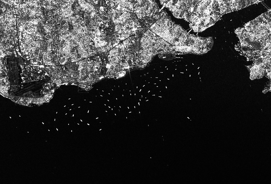

In [3]:
img_small = img.resize((round(img.size[0]/10), (round(img.size[1]/10))))
img_small

In [4]:
draw = ImageDraw.Draw(img_small)

coordinates = [
    (100, 100),
    (150, 150),
]

draw.rectangle(xy=coordinates, outline='yellow', width=3)

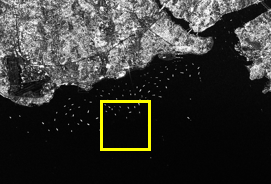

In [5]:
img_small

## Save an image

In [6]:
img_small.save('../data/ship_detection/ships_rect.png')

## Crop images

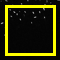

In [7]:
img_crop = img_small.crop((95, 95, 155, 155))
img_crop

## Turn image into array

In [8]:
i = np.array(img_crop)
i.shape

(60, 60, 4)

***
# Search the image for ships

## Load the model

In [9]:
model = keras.models.load_model('ship_detection_model.h5')

## Loop over rows and columns 
to crop a 64x64 patch out of the image and push it into the model

In [32]:
size = 64
step_size = 64
ships = []

for x in range(0, img.size[0] - size, step_size):
    for y in range(0, img.size[1] - size, step_size):
        patch = img.crop((x, y, x + size, y + size))
        # show image
        # plt.imshow(patch)
        # convert to numpy array
        patch_array = np.asarray(patch)[:, :, :1]
        patch_array_scaled = patch_array.astype(np.float32) / 255
        # reshape to match the way the model was trained
        patch_array_scaled_reshaped = patch_array_scaled.reshape(
            -1, size, size, 1,
        )

        # do the prediction with out previously trained model
        pred = model.predict(patch_array_scaled_reshaped, verbose=0)
        if pred[0][0] > 0.99:
            ships.append((x, y))

In [33]:
print(f'found {len(ships)} potential ship(s)')

found 94 potential ship(s)


## Highlight all potential ships in the image

In [34]:
img_new = img.copy()

img_draw = ImageDraw.Draw(img_new)

for ship in ships:
    coord = [
        ship,
        (ship[0] + 64, ship[1] + 64),
    ]
    img_draw.rectangle(coord, outline='yellow', width=3)

In [35]:
img_new.save('../data/ship_detection/detected_ships.png')